In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
from google.colab import files


uploaded = files.upload()


Saving Zomato data .csv to Zomato data .csv


In [14]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [16]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

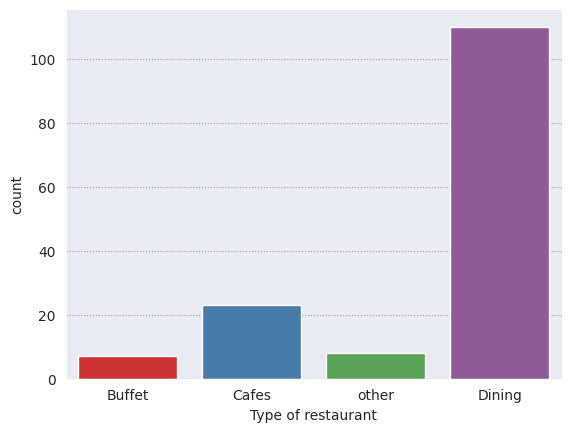

In [30]:
sns.countplot(x=dataframe['listed_in(type)'], palette='Set1')
plt.xlabel("Type of restaurant")


Text(0, 0.5, 'Votes')

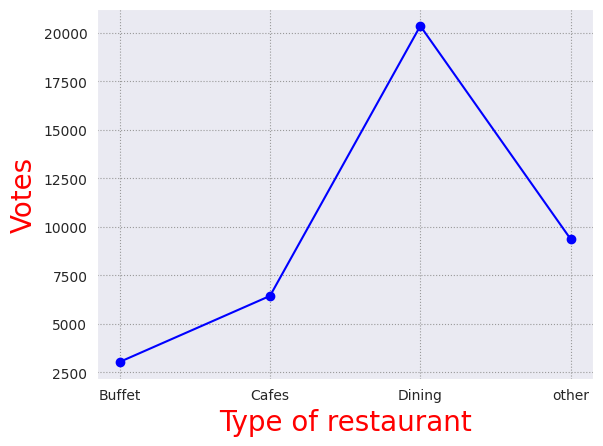

In [23]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


In [24]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

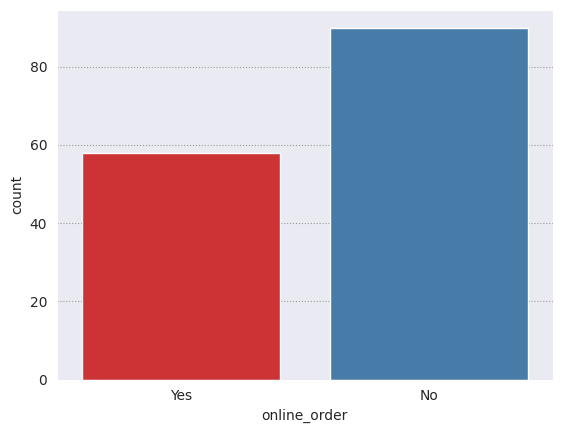

In [33]:
sns.countplot(x=dataframe['online_order'],palette='Set1')


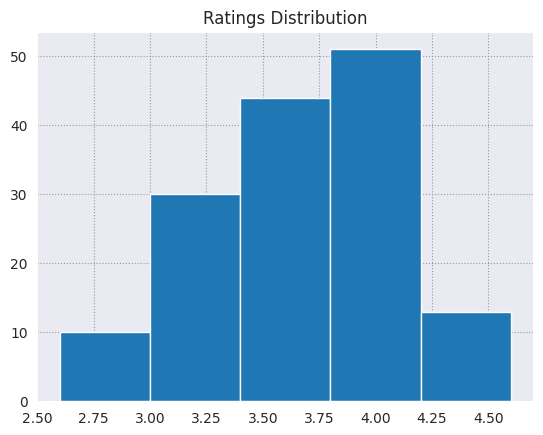

In [34]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


Text(0.5, 1.0, 'Distribution of Cost')

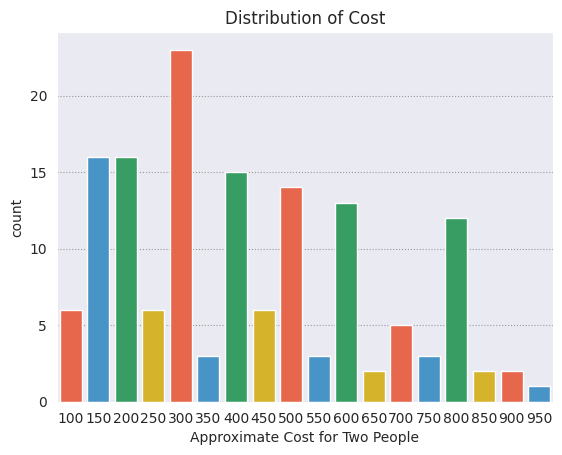

In [44]:
couple_data=dataframe['approx_cost(for two people)']
custom_palette = ['#FF5733', '#3498DB', '#27AE60', '#F1C40F']
sns.countplot(x=couple_data,palette=custom_palette)
plt.xlabel("Approximate Cost for Two People")
plt.title("Distribution of Cost")


<Axes: xlabel='online_order', ylabel='rate'>

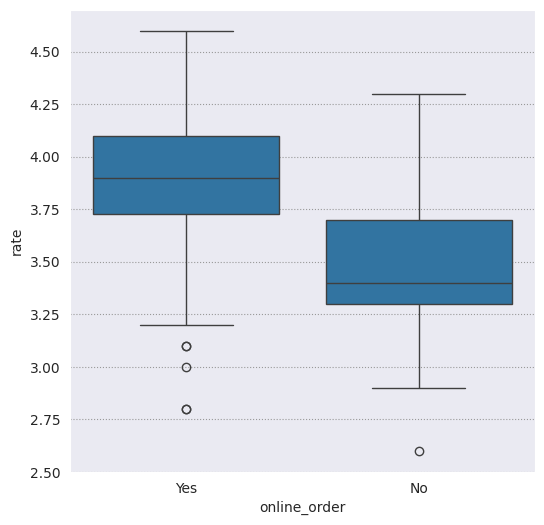

In [40]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


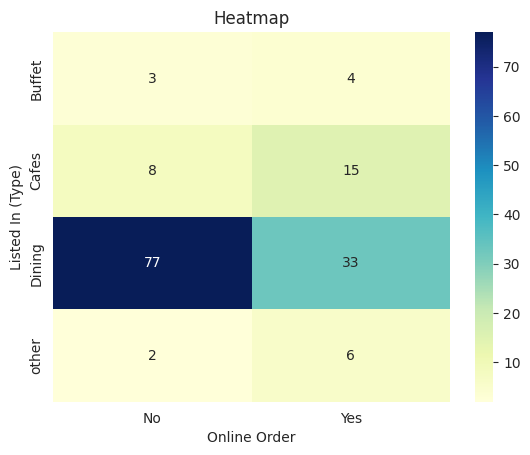

In [41]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
